In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582086 sha256=619df74823a5dcf1d525a8088c8b8574802c41bfc929115cebe274f300c9e787
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


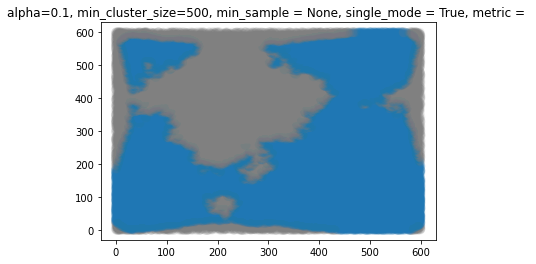

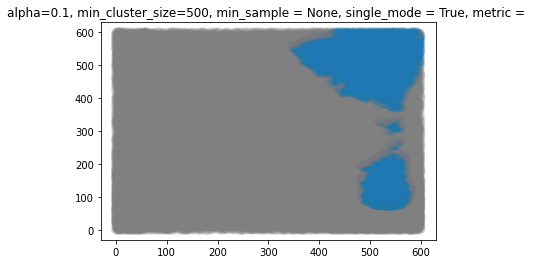

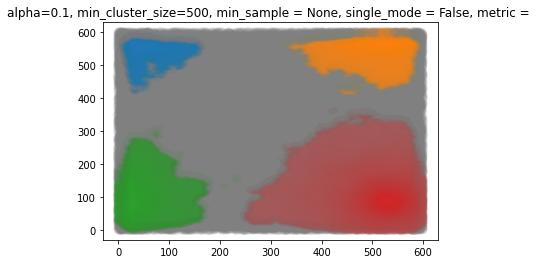

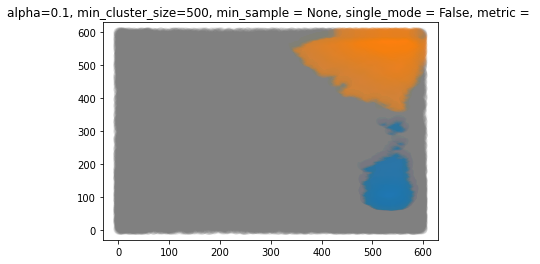

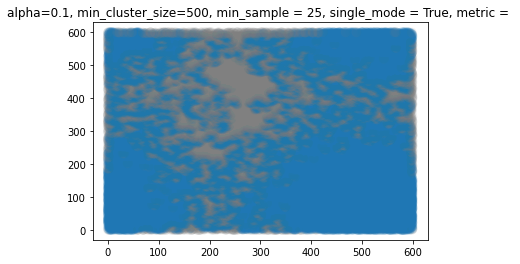

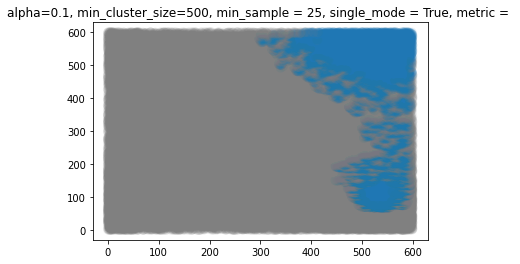

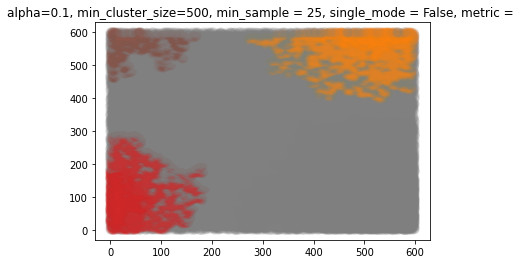

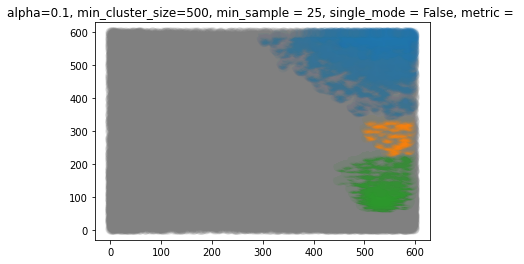

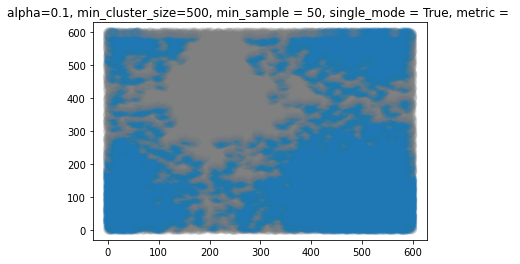

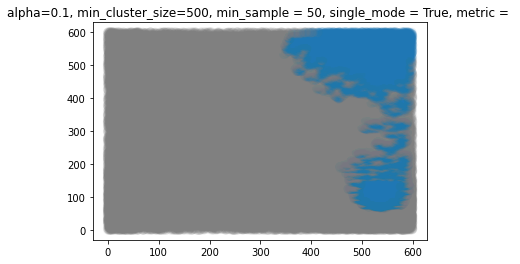

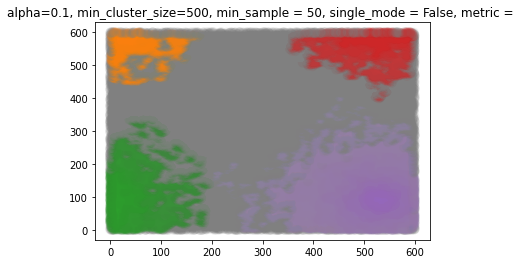

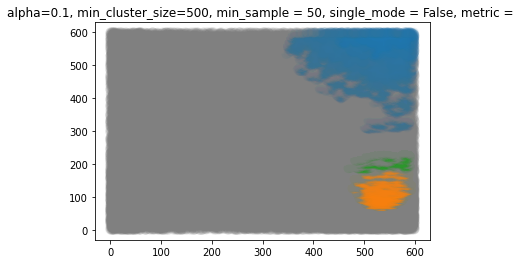

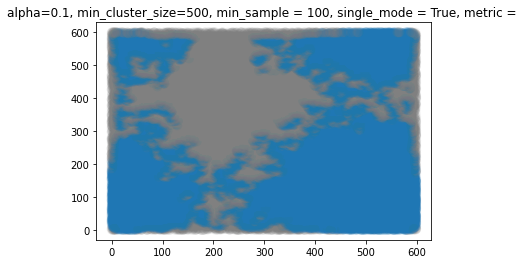

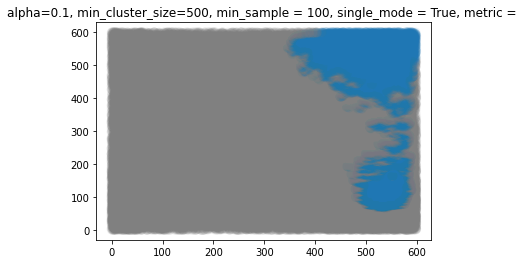

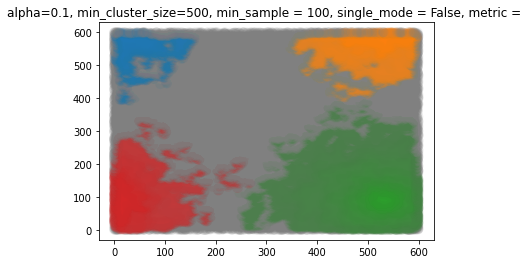

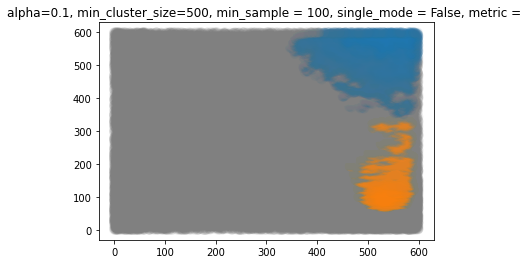

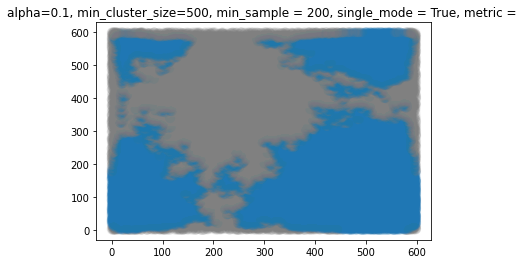

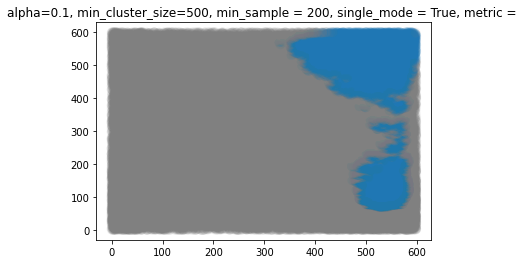

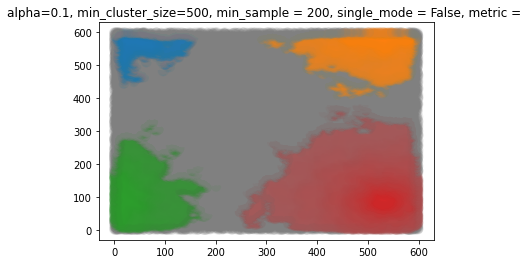

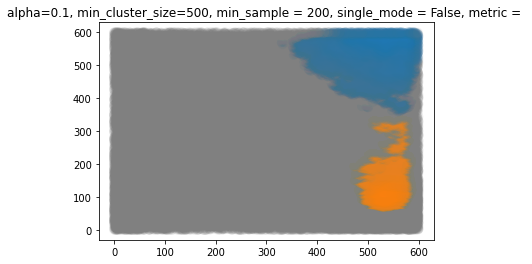

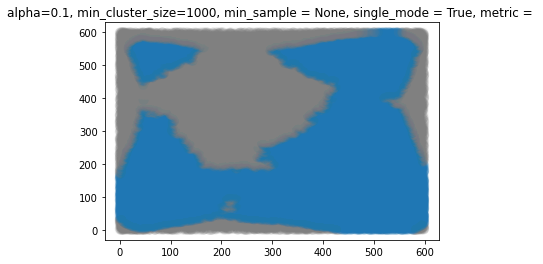

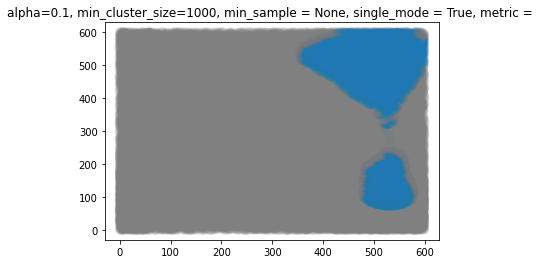

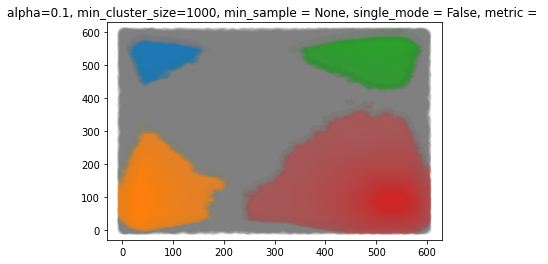

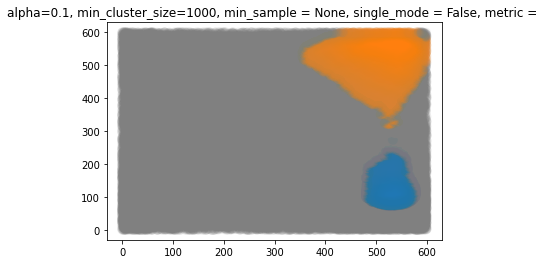

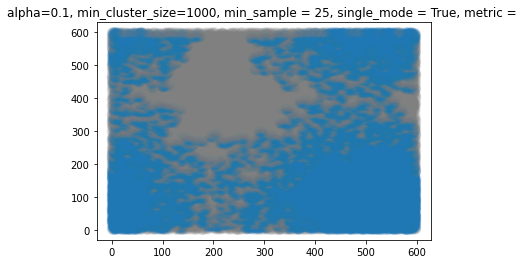

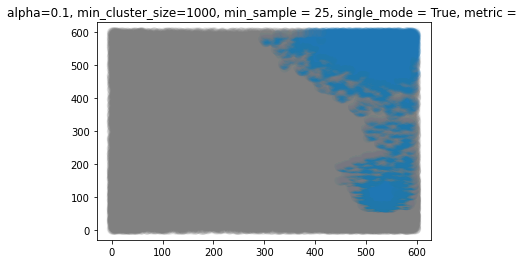

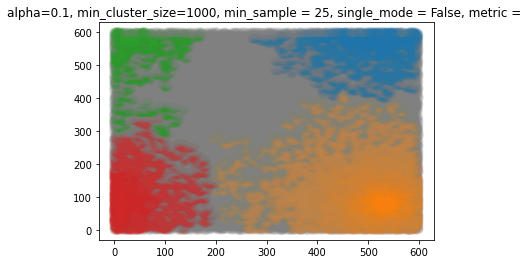

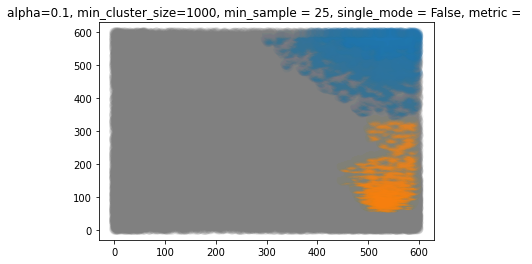

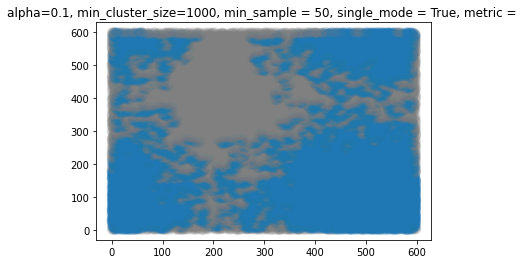

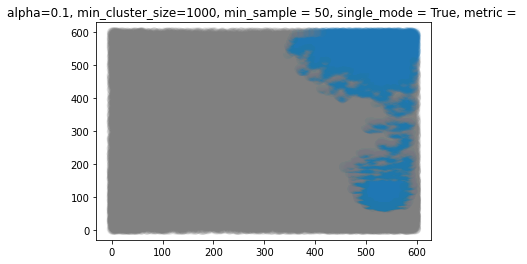

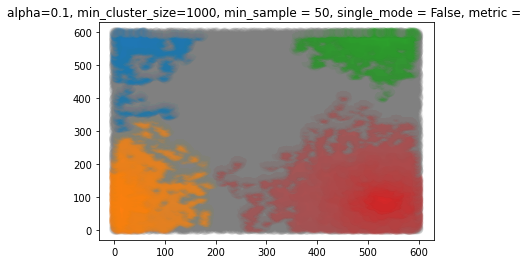

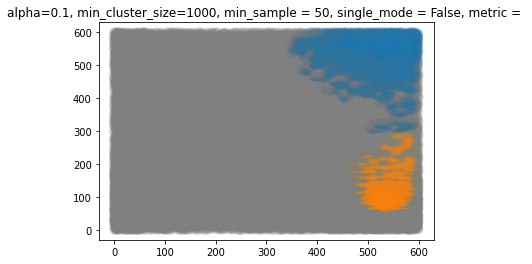

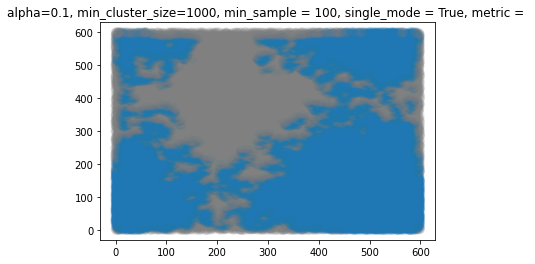

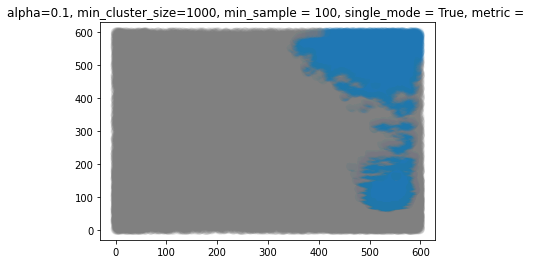

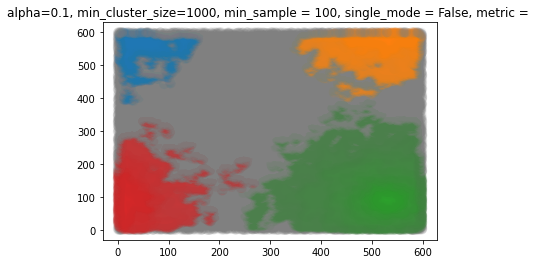

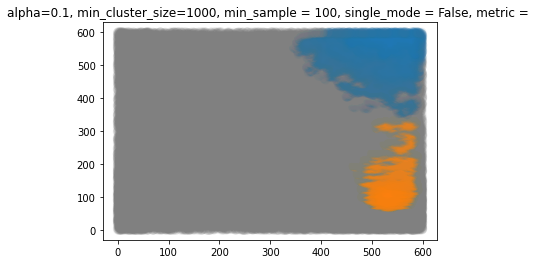

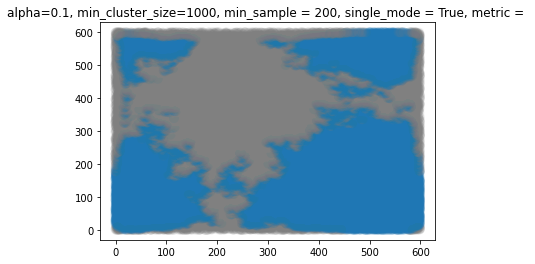

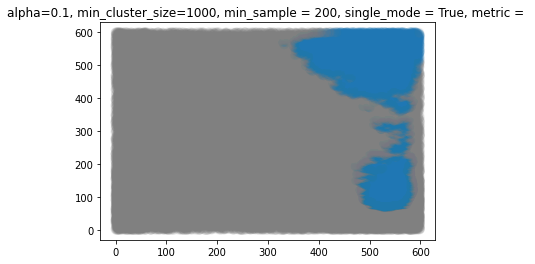

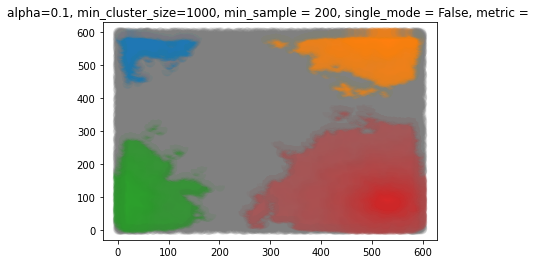

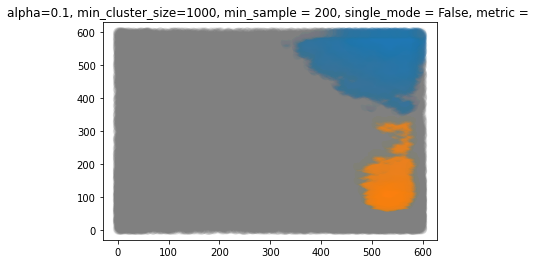

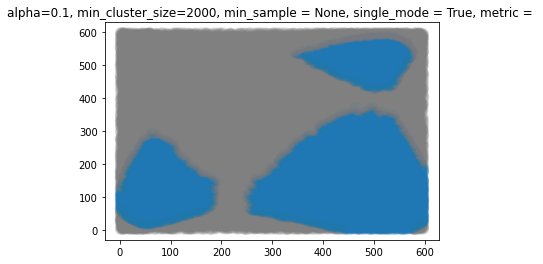

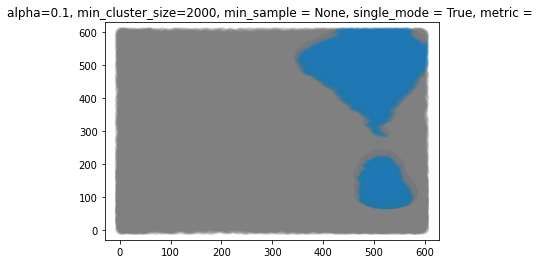

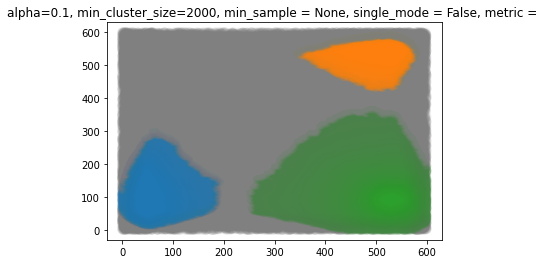

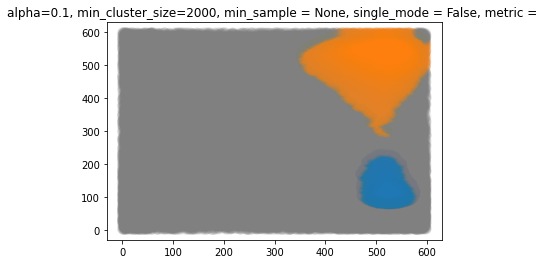

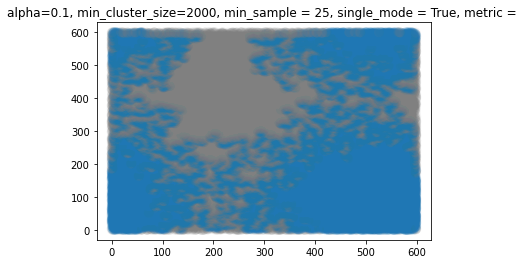

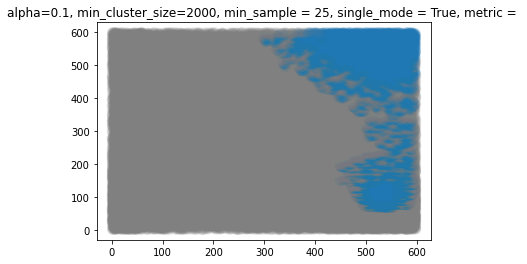

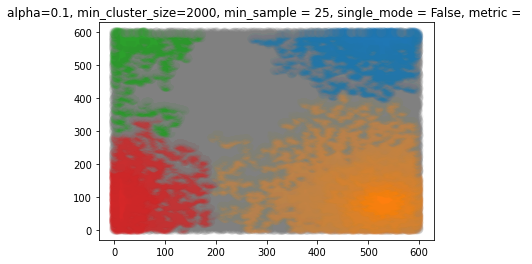

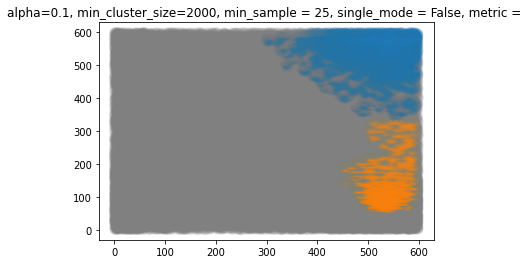

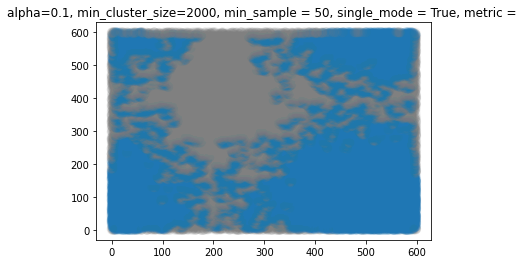

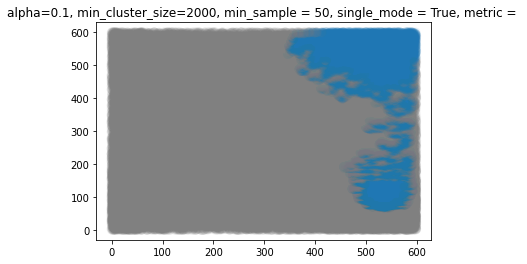

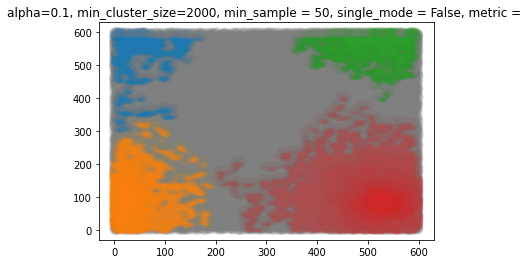

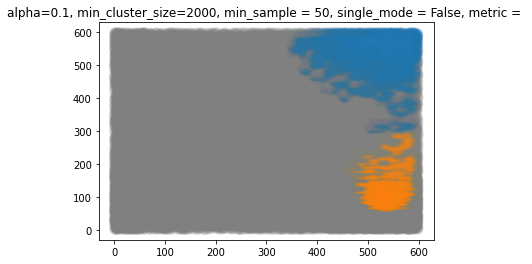

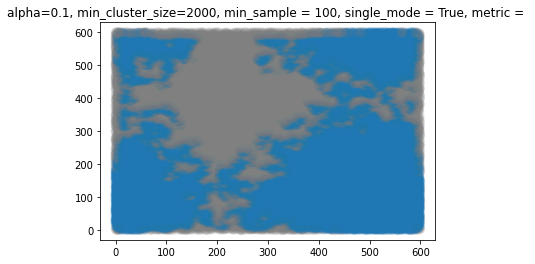

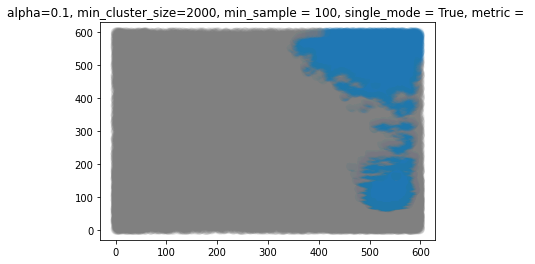

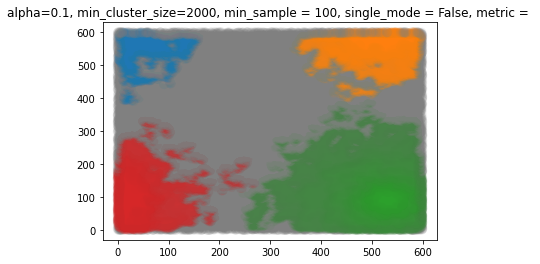

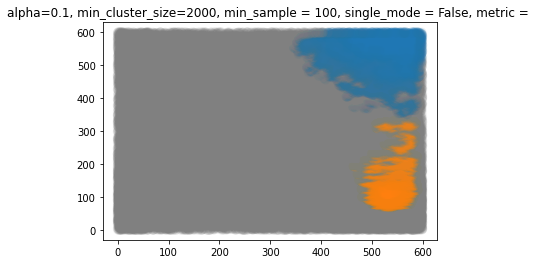

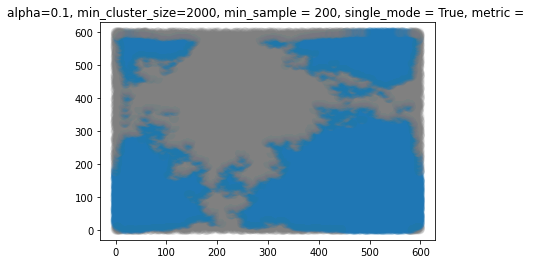

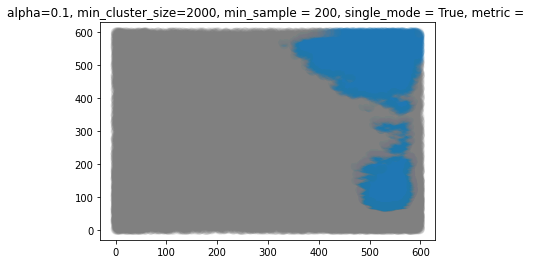

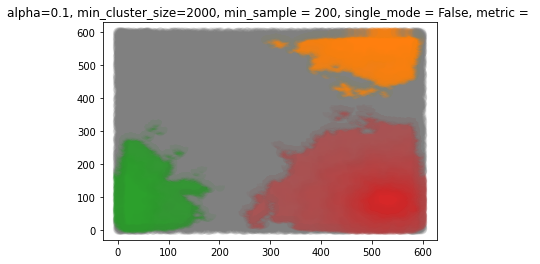

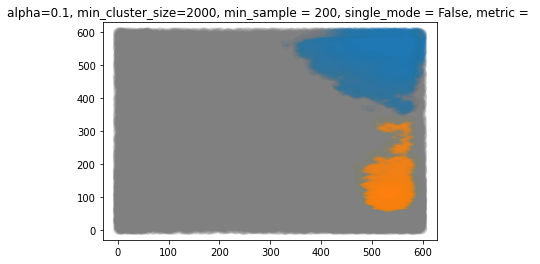

TerminatedWorkerError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.image as img
import hdbscan
from joblib import Memory
import seaborn as sns

# Import image
filename = '/content/N1W0_5V0_1.tif'
img1 = cv2.imread(filename, 1)

# Read image
img_grey = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Define a threshold, 0.5 is the middle of black and white in grey scale
thresh = 0.5

# Threshold the image
img_binary = cv2.threshold(img_grey, thresh, 1, cv2.THRESH_BINARY)[1]

# Convert image to NumPy array
arr = np.asarray(img_binary)
ix = np.isin(arr, 1)
coordinates = []
for i in np.where(ix):
    coordinates.append(i)
coordinates = [(coordinates[1]),(coordinates[0])]
coordinates = np.asarray(coordinates)
coordinates = coordinates.T

# Create a list of parameter combinations to try
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
min_cluster_sizes = [500, 1000, 2000, 5000, 50000]
min_samples = [None, 25, 50 , 100, 200]
single_mode = [True, False]
metric = ['euclidean', "canberra"]
# Plot the minimum spanning tree for each parameter combination
for alpha in alphas:
    for min_cluster_size in min_cluster_sizes:
      for min_samp in min_samples : 
        for single in single_mode : 
          for met in metric : 
              hdbscan.plots._plot_mst_warning = False
              clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples= min_samp, metric= met, alpha=alpha, p=None, algorithm='best', leaf_size=100, approx_min_span_tree=True, gen_min_span_tree=True, core_dist_n_jobs=4, allow_single_cluster=single, match_reference_implementation=True)
              clusterer.fit(coordinates)
              plt.figure()
              palette = sns.color_palette(palette=None, n_colors=20)
              plot_kwds = {'alpha' : 0.1, 's' : 100, 'linewidths':0}
              cluster_colors = [sns.desaturate(palette[col], sat)
                        if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                        zip(clusterer.labels_,clusterer.probabilities_)]
              plt.scatter(coordinates.T[0], coordinates.T[1], c=cluster_colors, **plot_kwds)
              plt.title('alpha={}, min_cluster_size={}, min_sample = {}, single_mode = {}, metric = '.format(alpha, min_cluster_size, min_samp, single, met))
              plt.show()

In [ ]:
labels = clusterer.labels_

In [ ]:
prob=clusterer.probabilities_
prob.shape

In [ ]:
# Find the dense clusters
dense_labels = labels[np.where(prob)]
dense_labels

In [ ]:
# Compute the number, size, and density of the dense clusters
num_clusters = len(set(dense_labels)) - (1 if -1 in dense_labels else 0)
sizes = [np.sum(dense_labels == i) for i in range(num_clusters)]
densities = [np.mean(prob[dense_labels]) for i in range(num_clusters)]
print(num_clusters)
print(sizes)
print(densities)